In [1]:
# Design Output Feedback Control

import control
from control import ctrb, obsv, place

import numpy as np
from numpy.linalg import eig, matrix_rank
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
# Example 0
A = np.array([[0, 1], 
              [0, 0]])
B = np.array([[0], 
              [1]])
C = np.array([[1, 0]])

#print(A)

In [4]:
# Compute eigenvalues, eigenvectors
w,v = eig(A)
print('eigenvalues:', w)

eigenvalues: [0. 0.]


In [5]:
# Controllability matrix
W_c = ctrb(A, B)
matrix_rank(W_c)

np.int64(2)

In [5]:
# Step 1: design F s.t. A+BF is stable
desired_control_poles = [-1, -5]
F = -place(A,B,desired_control_poles)

# confirm desired eigenvalues
print(eig(A+B*F))
#print(F)

EigResult(eigenvalues=array([-1., -5.]), eigenvectors=array([[ 0.70710678, -0.19611614],
       [-0.70710678,  0.98058068]]))


In [8]:
# Observability matrix
W_o=obsv(A, C)
matrix_rank(W_o)

np.int64(2)

In [9]:
# Step 2: design L s.t. A+LC is stable
desired_observer_poles = [-1, -2]
L = -place(A.T, C.T, desired_observer_poles).T

# confirm desired eigenvalues
#print(eig(A+L*C))
print(L)

[[-3.]
 [-2.]]


In [10]:
# Closed-loop system matrix
A_cl = np.block([
    [A,           B @ F],
    [-L @ C,      A + B @ F + L @ C]
])

print(A_cl)

w_cl,v_cl = eig(A_cl)
print('eigenvalues:', w_cl)

[[ 0.  1.  0.  0.]
 [ 0.  0. -5. -6.]
 [ 3.  0. -3.  1.]
 [ 2.  0. -7. -6.]]
eigenvalues: [-5.         -2.         -1.00000004 -0.99999996]


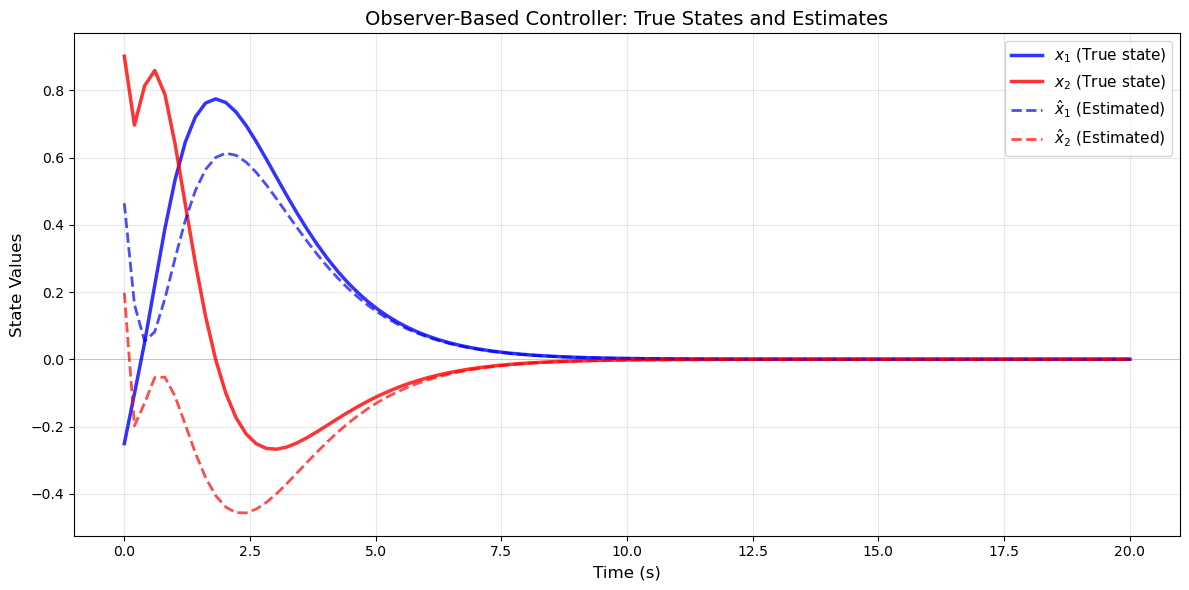

In [11]:
# Plot
def f(t, x):
    return A_cl @ x

t0, t1 = 0, 20                # start and end
t_span = (t0, t1)
t_eval = np.linspace(t0, t1, 100)  # the points of evaluation of solution             

# Initial condition
np.random.seed(42)  # For reproducibility
x0 = np.random.uniform(-1, 1, size=4)
#print(x0)

# Solve ODE using modern solve_ivp
sol = solve_ivp(f, t_span, x0, t_eval=t_eval)

# Plot the results
plt.figure(figsize=(12, 6))

plt.plot(sol.t, sol.y[0], 'b-', linewidth=2.5, label='$x_1$ (True state)', alpha=0.8)
plt.plot(sol.t, sol.y[1], 'r-', linewidth=2.5, label='$x_2$ (True state)', alpha=0.8)
plt.plot(sol.t, sol.y[2], 'b--', linewidth=2, label='$\\hat{x}_1$ (Estimated)', alpha=0.7)
plt.plot(sol.t, sol.y[3], 'r--', linewidth=2, label='$\\hat{x}_2$ (Estimated)', alpha=0.7)

plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('State Values', fontsize=12)
plt.title('Observer-Based Controller: True States and Estimates', fontsize=14)
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.2, linewidth=0.5)
plt.tight_layout()
plt.show()